In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")

submissionFile = pd.read_csv("sample_submission.csv")

In [214]:
#Combine test and train into one file
train['source']='train'
test['source']='test'
data = pd.concat([train, test],ignore_index=True)
print (train.shape, test.shape, data.shape)

(95662, 17) (45019, 16) (140681, 17)


C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [215]:
data.head()

,AccountId,Amount,BatchId,ChannelId,CountryCode,CurrencyCode,CustomerId,FraudResult,PricingStrategy,ProductCategory,ProductId,ProviderId,SubscriptionId,TransactionId,TransactionStartTime,Value,source
0,AccountId_3957,1000.0,BatchId_36123,ChannelId_3,256,UGX,CustomerId_4406,0.0,2,airtime,ProductId_10,ProviderId_6,SubscriptionId_887,TransactionId_76871,2018-11-15T02:18:49Z,1000,train
1,AccountId_4841,-20.0,BatchId_15642,ChannelId_2,256,UGX,CustomerId_4406,0.0,2,financial_services,ProductId_6,ProviderId_4,SubscriptionId_3829,TransactionId_73770,2018-11-15T02:19:08Z,20,train
2,AccountId_4229,500.0,BatchId_53941,ChannelId_3,256,UGX,CustomerId_4683,0.0,2,airtime,ProductId_1,ProviderId_6,SubscriptionId_222,TransactionId_26203,2018-11-15T02:44:21Z,500,train
3,AccountId_648,20000.0,BatchId_102363,ChannelId_3,256,UGX,CustomerId_988,0.0,2,utility_bill,ProductId_21,ProviderId_1,SubscriptionId_2185,TransactionId_380,2018-11-15T03:32:55Z,21800,train
4,AccountId_4841,-644.0,BatchId_38780,ChannelId_2,256,UGX,CustomerId_988,0.0,2,financial_services,ProductId_6,ProviderId_4,SubscriptionId_3829,TransactionId_28195,2018-11-15T03:34:21Z,644,train


In [216]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

Number of variables,17
Number of observations,140681
Total Missing (%),1.9%
Total size in memory,18.2 MiB
Average record size in memory,136.0 B
Numeric,3
Categorical,10
Boolean,0
Date,0
Text (Unique),1
Rejected,3


In [217]:
data.isnull().sum()

AccountId                   0
Amount                      0
BatchId                     0
ChannelId                   0
CountryCode                 0
CurrencyCode                0
CustomerId                  0
FraudResult             45019
PricingStrategy             0
ProductCategory             0
ProductId                   0
ProviderId                  0
SubscriptionId              0
TransactionId               0
TransactionStartTime        0
Value                       0
source                      0
dtype: int64

In [218]:
#Drop the columns
data.drop(['CountryCode','CurrencyCode','BatchId','AccountId',
           'SubscriptionId','CustomerId','TransactionId','TransactionStartTime','Amount'],axis=1,inplace=True)

In [219]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140681 entries, 0 to 140680
Data columns (total 8 columns):
ChannelId          140681 non-null object
FraudResult        95662 non-null float64
PricingStrategy    140681 non-null int64
ProductCategory    140681 non-null object
ProductId          140681 non-null object
ProviderId         140681 non-null object
Value              140681 non-null int64
source             140681 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 8.6+ MB


In [220]:
data.ChannelId.unique()

array(['ChannelId_3', 'ChannelId_2', 'ChannelId_1', 'ChannelId_5',
       'ChannelId_4'], dtype=object)

In [221]:
data.PricingStrategy.value_counts()

2    117426
4     20043
1      2559
0       653
Name: PricingStrategy, dtype: int64

In [222]:
data.ProductCategory.value_counts()

financial_services    67105
airtime               65950
utility_bill           2660
data_bundles           2527
tv                     1738
movies                  253
ticket                  232
retail                  184
transport                30
other                     2
Name: ProductCategory, dtype: int64

In [223]:
data.ProviderId.value_counts()

ProviderId_4    56445
ProviderId_6    50007
ProviderId_5    21519
ProviderId_1     8034
ProviderId_3     4652
ProviderId_2       24
Name: ProviderId, dtype: int64

In [224]:
from feature_engine import categorical_encoders as ce

ohe_enc = ce.OneHotCategoricalEncoder(
    top_categories=None,
    variables=["ProviderId", "ProductCategory", "ProductId", "ChannelId"],
    drop_last=False)

ohe_enc.fit(data)
data = ohe_enc.transform(data)
ohe_enc.encoder_dict_

{'ProviderId': array(['ProviderId_6', 'ProviderId_4', 'ProviderId_1', 'ProviderId_5',
        'ProviderId_3', 'ProviderId_2'], dtype=object),
 'ProductCategory': array(['airtime', 'financial_services', 'utility_bill', 'data_bundles',
        'tv', 'transport', 'ticket', 'movies', 'other', 'retail'],
       dtype=object),
 'ProductId': array(['ProductId_10', 'ProductId_6', 'ProductId_1', 'ProductId_21',
        'ProductId_3', 'ProductId_15', 'ProductId_11', 'ProductId_19',
        'ProductId_4', 'ProductId_5', 'ProductId_20', 'ProductId_9',
        'ProductId_24', 'ProductId_14', 'ProductId_2', 'ProductId_13',
        'ProductId_22', 'ProductId_8', 'ProductId_7', 'ProductId_27',
        'ProductId_12', 'ProductId_16', 'ProductId_23', 'ProductId_26',
        'ProductId_25', 'ProductId_18', 'ProductId_17'], dtype=object),
 'ChannelId': array(['ChannelId_3', 'ChannelId_2', 'ChannelId_1', 'ChannelId_5',
        'ChannelId_4'], dtype=object)}

In [225]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140681 entries, 0 to 140680
Data columns (total 52 columns):
FraudResult                           95662 non-null float64
PricingStrategy                       140681 non-null int64
Value                                 140681 non-null int64
source                                140681 non-null object
ProviderId_ProviderId_6               140681 non-null int32
ProviderId_ProviderId_4               140681 non-null int32
ProviderId_ProviderId_1               140681 non-null int32
ProviderId_ProviderId_5               140681 non-null int32
ProviderId_ProviderId_3               140681 non-null int32
ProviderId_ProviderId_2               140681 non-null int32
ProductCategory_airtime               140681 non-null int32
ProductCategory_financial_services    140681 non-null int32
ProductCategory_utility_bill          140681 non-null int32
ProductCategory_data_bundles          140681 non-null int32
ProductCategory_tv                    140681 no

In [226]:
#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [227]:
#Drop unnecessary columns:
labels = train.FraudResult

test.drop(['FraudResult','source'],axis=1,inplace=True)
train.drop(['FraudResult','source'],axis=1,inplace=True)


C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [228]:
train.head()

,PricingStrategy,Value,ProviderId_ProviderId_6,ProviderId_ProviderId_4,ProviderId_ProviderId_1,ProviderId_ProviderId_5,ProviderId_ProviderId_3,ProviderId_ProviderId_2,ProductCategory_airtime,ProductCategory_financial_services,...,ProductId_ProductId_23,ProductId_ProductId_26,ProductId_ProductId_25,ProductId_ProductId_18,ProductId_ProductId_17,ChannelId_ChannelId_3,ChannelId_ChannelId_2,ChannelId_ChannelId_1,ChannelId_ChannelId_5,ChannelId_ChannelId_4
0,2,1000,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,2,20,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,2,500,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,2,21800,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,2,644,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [229]:
test.head()

,PricingStrategy,Value,ProviderId_ProviderId_6,ProviderId_ProviderId_4,ProviderId_ProviderId_1,ProviderId_ProviderId_5,ProviderId_ProviderId_3,ProviderId_ProviderId_2,ProductCategory_airtime,ProductCategory_financial_services,...,ProductId_ProductId_23,ProductId_ProductId_26,ProductId_ProductId_25,ProductId_ProductId_18,ProductId_ProductId_17,ChannelId_ChannelId_3,ChannelId_ChannelId_2,ChannelId_ChannelId_1,ChannelId_ChannelId_5,ChannelId_ChannelId_4
95662,4,1000,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
95663,2,2000,0,0,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
95664,2,50,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
95665,4,3000,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
95666,2,60,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [83]:
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
train = mm_scaler.fit_transform(train)
test = mm_scaler.transform(test)

In [230]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import plot_tree
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from numpy import sort

In [231]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.4, random_state=0)  
X_train.shape, X_test.shape

((57397, 50), (38265, 50))

In [86]:
# xg_cl = xgb.XGBClassifier(objective='binary:logistic',learning_rate=0.01,subsample=0.55,n_estimators=200, seed=123)
xg_cl = xgb.XGBClassifier(objective='binary:logistic',learning_rate=0.1,scale_pos_weight=)
eval_set = [(X_train, y_train), (X_test, y_test)]
xg_cl.fit(X_train, y_train,eval_metric=["error","logloss","auc"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.000383	validation_0-logloss:0.598113	validation_0-auc:0.958627	validation_1-error:0.000575	validation_1-logloss:0.598327	validation_1-auc:0.923494
[1]	validation_0-error:0.000383	validation_0-logloss:0.520252	validation_0-auc:0.958627	validation_1-error:0.000575	validation_1-logloss:0.520589	validation_1-auc:0.923494
[2]	validation_0-error:0.000383	validation_0-logloss:0.455498	validation_0-auc:0.958627	validation_1-error:0.000575	validation_1-logloss:0.455679	validation_1-auc:0.923494
[3]	validation_0-error:0.000383	validation_0-logloss:0.400862	validation_0-auc:0.958627	validation_1-error:0.000575	validation_1-logloss:0.401066	validation_1-auc:0.923494
[4]	validation_0-error:0.000383	validation_0-logloss:0.354064	validation_0-auc:0.958641	validation_1-error:0.000575	validation_1-logloss:0.354306	validation_1-auc:0.923508
[5]	validation_0-error:0.000383	validation_0-logloss:0.314006	validation_0-auc:0.958641	validation_1-error:0.000575	validation_1-logloss:0.3

[48]	validation_0-error:0.000314	validation_0-logloss:0.004674	validation_0-auc:0.99575	validation_1-error:0.000601	validation_1-logloss:0.005497	validation_1-auc:0.971825
[49]	validation_0-error:0.000314	validation_0-logloss:0.004337	validation_0-auc:0.995751	validation_1-error:0.000601	validation_1-logloss:0.005166	validation_1-auc:0.971827
[50]	validation_0-error:0.000296	validation_0-logloss:0.004022	validation_0-auc:0.995752	validation_1-error:0.000601	validation_1-logloss:0.004867	validation_1-auc:0.971831
[51]	validation_0-error:0.000296	validation_0-logloss:0.003743	validation_0-auc:0.995755	validation_1-error:0.000601	validation_1-logloss:0.004598	validation_1-auc:0.971819
[52]	validation_0-error:0.000296	validation_0-logloss:0.003489	validation_0-auc:0.995763	validation_1-error:0.000601	validation_1-logloss:0.004354	validation_1-auc:0.971836
[53]	validation_0-error:0.000296	validation_0-logloss:0.003259	validation_0-auc:0.995763	validation_1-error:0.000601	validation_1-loglos

[96]	validation_0-error:0.000279	validation_0-logloss:0.001052	validation_0-auc:0.999655	validation_1-error:0.000601	validation_1-logloss:0.002348	validation_1-auc:0.972787
[97]	validation_0-error:0.000279	validation_0-logloss:0.001046	validation_0-auc:0.999655	validation_1-error:0.000601	validation_1-logloss:0.002347	validation_1-auc:0.972787
[98]	validation_0-error:0.000279	validation_0-logloss:0.00104	validation_0-auc:0.999655	validation_1-error:0.000601	validation_1-logloss:0.002345	validation_1-auc:0.972785
[99]	validation_0-error:0.000279	validation_0-logloss:0.001036	validation_0-auc:0.999655	validation_1-error:0.000601	validation_1-logloss:0.002344	validation_1-auc:0.972156


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

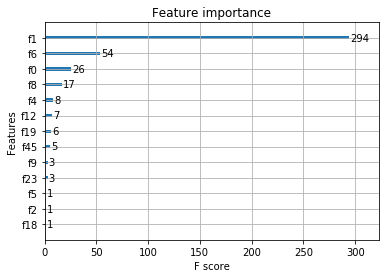

In [87]:
plot_importance(xg_cl)
plt.show()

In [88]:
preds = xg_cl.predict(X_test)

In [89]:
accuracy = accuracy_score(y_test,preds)
accuracy

0.9993989285247615

In [90]:
results = confusion_matrix(y_test, preds) 
print(results)

[[38187     6]
 [   17    55]]


In [91]:
prediction = xg_cl.predict(test)

In [92]:
submission = pd.DataFrame({
    "TransactionId": submissionFile["TransactionId"],
    "FraudResult": prediction
})

submission.to_csv('submission.csv', index=False)

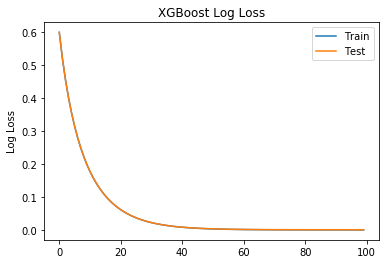

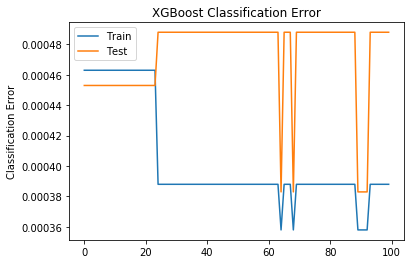

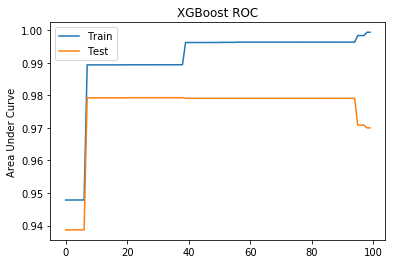

In [69]:
results = xg_cl.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.title('XGBoost Classification Error')
plt.show()
# plot ROC
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('Area Under Curve')
plt.title('XGBoost ROC')
plt.show()

In [70]:
tuned_params = {"objective":"binary:logistic",'colsample_bytree': 0.3, 'max_depth': 10,'subsample': 0.55, 'n_estimators': 200, 'learning_rate': 0.2}
thresholds = sort(xg_cl.feature_importances_)
models = []
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(xg_cl, threshold=thresh, prefit=True)
    select_X_train = selection.transform(X_train)
    # train model
    selection_model = xgb.XGBClassifier(objective='binary:logistic',learning_rate=0.3)
    selection_model.fit(select_X_train, y_train)
    # add model to models
    models.append([selection_model,selection])
    # eval model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1],
    accuracy*100.0))

C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.021, n=5, Accuracy: 99.96%


C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.042, n=4, Accuracy: 99.95%


C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.058, n=3, Accuracy: 99.95%


C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Thresh=0.137, n=2, Accuracy: 99.96%
Thresh=0.741, n=1, Accuracy: 99.96%


C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [71]:
# Finalize transformations
final_model = models[1][0]
final_selection = models[1][1]
final_X_train = final_selection.transform(X_train)

final_X_test = final_selection.transform(X_test)

final_y_pred = final_model.predict(final_X_test)
final_predictions = [round(value) for value in final_y_pred]

# Print evaluation metrics
accuracy = accuracy_score(y_test, final_predictions)
print("n=%d, Accuracy: %.2f%%" % (final_X_train.shape[1], accuracy*100.0))
confusion_matrix(y_test, final_predictions) 

C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


n=4, Accuracy: 99.95%


array([[28646,     4],
       [    9,    40]], dtype=int64)

In [ ]:
kfold = KFold(n_splits=10, random_state=7)
results = cross_val_score(final_model, train, labels, cv=kfold)
results

C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambig

In [ ]:
dmatrix = xgb.DMatrix(data=train,label=labels)

# params={"objective":"binary:logistic","max_depth":4}
# tuned_params = {"objective":"binary:logistic",'colsample_bytree': 0.3, 'max_depth': 10,'subsample': 0.55, 'n_estimators': 200, 'learning_rate': 0.2}
tuned_params = {"objective":"binary:logistic",'learning_rate': 0.3}
cv_results = xgb.cv(dtrain=dmatrix, params=tuned_params, nfold=5, num_boost_round=200, metrics="error",as_pandas=True, seed=123)

# Print the accuracy

print(((1-cv_results["test-error-mean"]).iloc[-1]))

In [176]:
selection = SelectFromModel(xg_cl, threshold=0.012, prefit=True)
select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test)
another_model = xgb.XGBClassifier(early_stopping_rounds=3, learning_rate=0.01, max_depth=5, n_estimators=75)
another_model.fit(select_X_train, y_train)

select_y_pred = another_model.predict(select_X_test)
select_predictions = [round(value) for value in select_y_pred]

# Print evaluation metrics
accuracy = accuracy_score(y_test, select_predictions)
print("n=%d, Accuracy: %.2f%%" % (select_X_train.shape[1], accuracy*100.0))
confusion_matrix(y_test, select_predictions) 

C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


n=8, Accuracy: 99.96%


array([[28649,     1],
       [   11,    38]], dtype=int64)

In [178]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45019 entries, 95662 to 140680
Data columns (total 23 columns):
Amount                                45019 non-null float64
PricingStrategy                       45019 non-null int64
ProviderId_ProviderId_6               45019 non-null int32
ProviderId_ProviderId_4               45019 non-null int32
ProviderId_ProviderId_1               45019 non-null int32
ProviderId_ProviderId_5               45019 non-null int32
ProviderId_ProviderId_3               45019 non-null int32
ProviderId_ProviderId_2               45019 non-null int32
ProductCategory_airtime               45019 non-null int32
ProductCategory_financial_services    45019 non-null int32
ProductCategory_utility_bill          45019 non-null int32
ProductCategory_data_bundles          45019 non-null int32
ProductCategory_tv                    45019 non-null int32
ProductCategory_transport             45019 non-null int32
ProductCategory_ticket                45019 non-null int32

In [179]:
train=selection.transform(train)
another_model.fit(train,labels)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, early_stopping_rounds=3,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=75, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [180]:
test=selection.transform(test)
prediction = another_model.predict(test)

C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [181]:
submission = pd.DataFrame({
    "TransactionId": submissionFile["TransactionId"],
    "FraudResult": prediction
})

submission.to_csv('submission2.csv', index=False)

In [182]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [183]:
predictions = dtree.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00     28650
        1.0       0.87      0.82      0.84        49

avg / total       1.00      1.00      1.00     28699

[[28644     6]
 [    9    40]]


In [206]:
prediction = dtree.predict(test)
submission = pd.DataFrame({
    "TransactionId": submissionFile["TransactionId"],
    "FraudResult": prediction
})

submission.to_csv('submission2.csv', index=False)

In [206]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [207]:
predictions = rfc.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38193
         1.0       0.83      0.75      0.79        72

    accuracy                           1.00     38265
   macro avg       0.92      0.87      0.89     38265
weighted avg       1.00      1.00      1.00     38265



In [208]:
#print(confusion_matrix(y_test,predictions))

<Figure size 432x288 with 0 Axes>

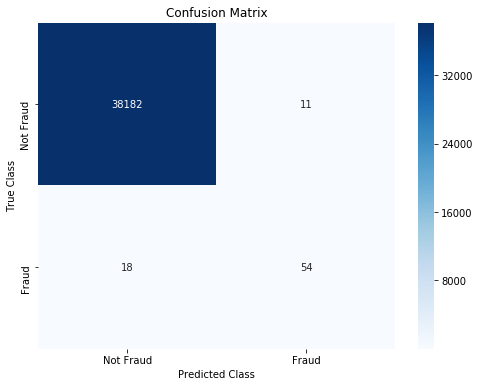

In [209]:
#Print Confusion Matrix
plt.figure()
cm = confusion_matrix(y_test, predictions)
labels = ['Not Fraud', 'Fraud']
plt.figure(figsize=(8,6))
sns.heatmap(cm, xticklabels = labels, yticklabels = labels, annot = True, fmt='d', cmap="Blues", vmin = 0.2);
plt.title('Confusion Matrix')
plt.ylabel('True Class')
plt.xlabel('Predicted Class')
plt.show()

In [201]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

print(accuracy_score(y_test, predictions))
print(f1_score(y_test, predictions))
print(recall_score(y_test, predictions))

0.9992682608127532
0.7941176470588235
0.75


In [179]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=27, ratio=1.0)
X_train_smote, y_train_smote = sm.fit_sample(X_train, y_train)

In [180]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=3)
rfc.fit(X_train_smote,y_train_smote)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=3,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [181]:
smote_pred = rfc.predict(X_test)

In [172]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score

print(accuracy_score(y_test, smote_pred))
print(f1_score(y_test, smote_pred))
print(recall_score(y_test, smote_pred))

0.9987194564223181
0.7100591715976331
0.8333333333333334


In [173]:
print(confusion_matrix(y_test,predictions))

[[38183    10]
 [   21    51]]


In [107]:
prediction = rfc.predict(test)
submission = pd.DataFrame({
    "TransactionId": submissionFile["TransactionId"],
    "FraudResult": prediction
})

submission.to_csv('submission2.csv', index=False)

In [208]:
from imblearn.over_sampling import SMOTE
smoteAlgo = SMOTE(random_state=0)
smote_data_x, smote_data_y = smoteAlgo(X_train, y_train)
smote_data_x = pd.DataFrame(smote_data_x, columns=X_train.columns)
smote_data_y = pd.DataFrame(smote_data_y, columns=["CLASS"])



ModuleNotFoundError: No module named 'imblearn'

In [159]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (66963, 50)
Number transactions y_train dataset:  (66963,)
Number transactions X_test dataset:  (28699, 50)
Number transactions y_test dataset:  (28699,)


In [160]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 144
Before OverSampling, counts of label '0': 66819 

After OverSampling, the shape of train_X: (133638, 50)
After OverSampling, the shape of train_y: (133638,) 

After OverSampling, counts of label '1': 66819
After OverSampling, counts of label '0': 66819


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train, y_train.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:   24.6s
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:   57.3s finished
C:\Users\mo.yosiwealth\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
